In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('dados/Fish.csv')

In [3]:
dados

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
dados.describe().round(2)

,Weight,Length1,Length2,Length3,Height,Width
count,159.00,159.00,159.00,159.00,159.00,159.00
mean,398.33,26.25,28.42,31.23,8.97,4.42
std,357.98,10.00,10.72,11.61,4.29,1.69
min,0.00,7.50,8.40,8.80,1.73,1.05
25%,120.00,19.05,21.00,23.15,5.94,3.39
50%,273.00,25.20,27.30,29.40,7.79,4.25
75%,650.00,32.70,35.50,39.65,12.37,5.58
max,1650.00,59.00,63.40,68.00,18.96,8.14


In [5]:
dados.corr().round(4)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.0000,0.9157,0.9186,0.9230,0.7243,0.8865
Length1,0.9157,1.0000,0.9995,0.9920,0.6254,0.8670
Length2,0.9186,0.9995,1.0000,0.9941,0.6404,0.8735
Length3,0.9230,0.9920,0.9941,1.0000,0.7034,0.8785
Height,0.7243,0.6254,0.6404,0.7034,1.0000,0.7929
Width,0.8865,0.8670,0.8735,0.8785,0.7929,1.0000


<AxesSubplot:title={'center':'Fish Weight'}>

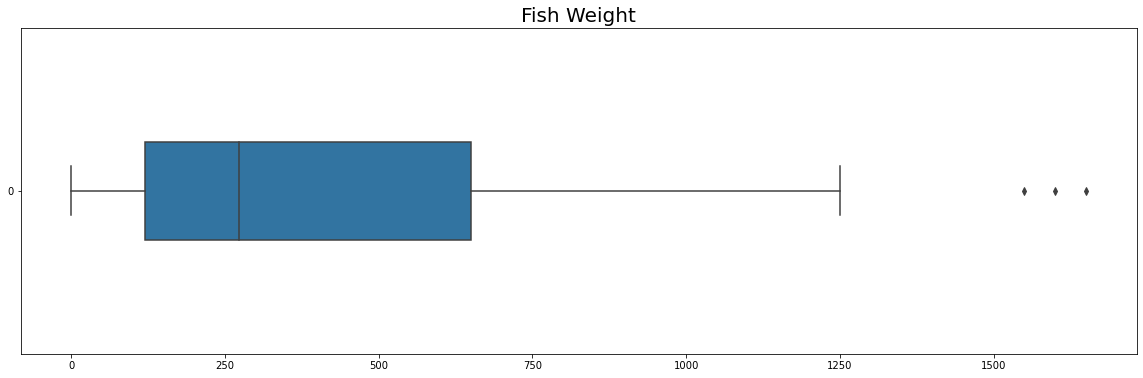

In [6]:
ax = sns.boxplot(data = dados['Weight'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Fish Weight', fontsize=20)
ax

## Dropping outliers

In [7]:
print(np.where(dados['Weight']>1400))

(array([142, 143, 144]),)


In [8]:
dados.drop([142, 143, 144], inplace = True)



<AxesSubplot:title={'center':'Fish Weight'}>

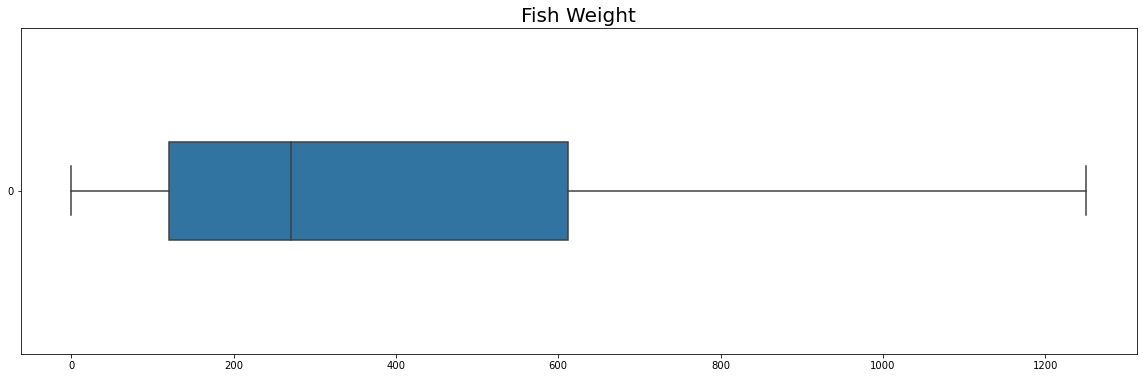

In [9]:
ax = sns.boxplot(data = dados['Weight'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Fish Weight', fontsize=20)
ax

<AxesSubplot:title={'center':'Fish Weight'}, xlabel='Weight', ylabel='Density'>

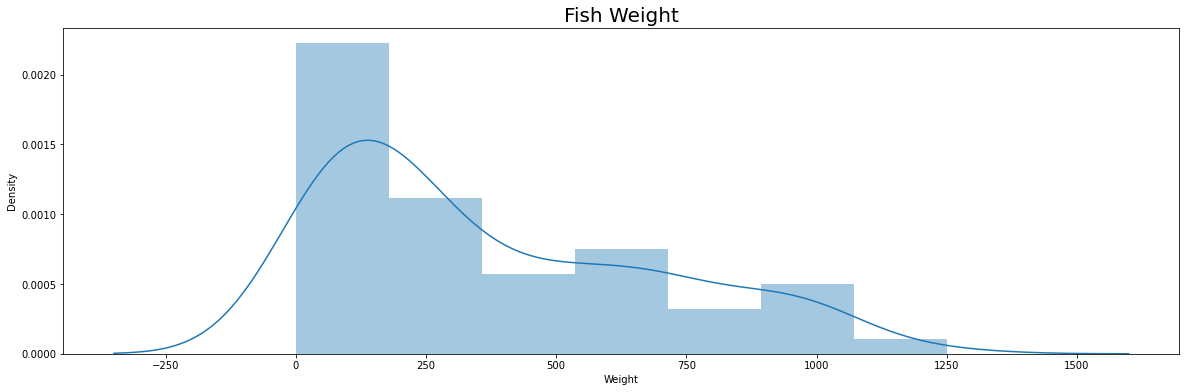

In [10]:
ax = sns.distplot(dados['Weight'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Fish Weight', fontsize=20)
ax

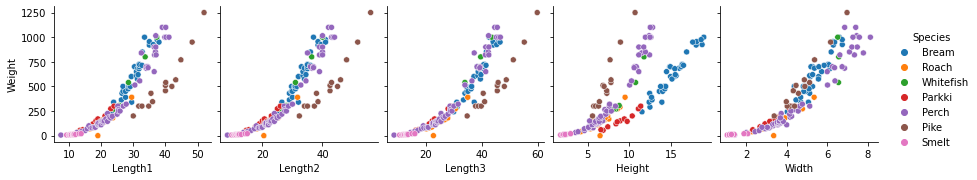

In [11]:
sns.pairplot(dados,
             x_vars=['Length1','Length2','Length3','Height','Width'],
            y_vars=['Weight'],hue='Species')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = dados[['Length1', 'Height', 'Width']]

In [14]:
y = dados['Weight']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2811)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
modelo = LinearRegression()

In [18]:
modelo.fit(X_train, y_train)

LinearRegression()

In [19]:
print(f'R**2 = {modelo.score(X_train, y_train).round(3)}')

R**2 = 0.901


In [20]:
y_previsto = modelo.predict(X_test)

In [21]:
print(f'R**2 = {metrics.r2_score(y_test, y_previsto).round(3)}')

R**2 = 0.87


In [22]:
entrada = X_test[0:1]
entrada

,Length1,Height,Width
122,37.1,11.135,6.63


In [23]:
modelo.predict(entrada)[0]

738.6462325555224

In [24]:
Length1 = 37.1
Height = 11.135
Width = 6.63
entrada = [[Length1, Height, Width]]

print(f'Weight: {modelo.predict(entrada)[0]:.2f} gramas.')

Weight: 738.65 gramas.


In [25]:
modelo.intercept_

-460.9128757393095

In [26]:
y_previsto_train = modelo.predict(X_train)

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='log Weight - Previsão', ylabel='log Weight - Real'>

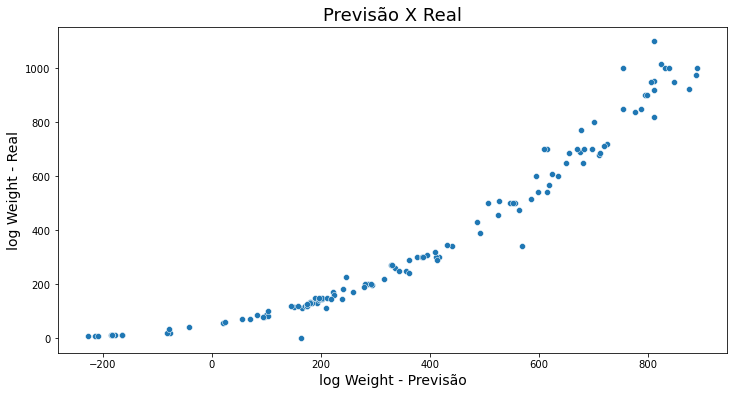

In [27]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log Weight - Previsão', fontsize=14)
ax.set_ylabel('log Weight - Real', fontsize=14)
ax

In [28]:
residuo = y_train - y_previsto_train

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Weight', ylabel='Density'>

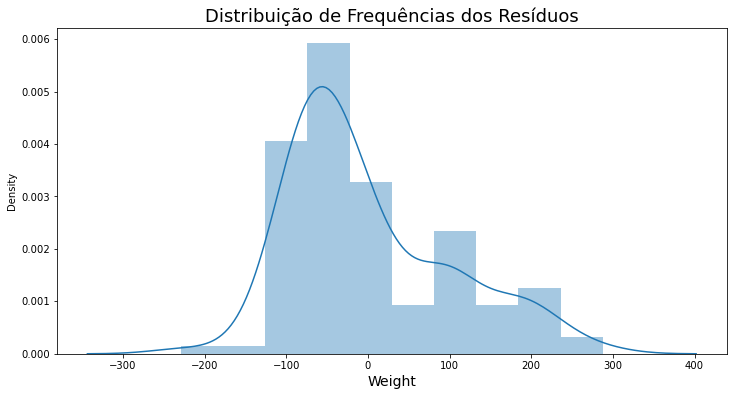

In [29]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Weight', fontsize=14)
ax